In [1]:
# loading the libraries
import statistics
import pandas as pd
import numpy as np

# For seperating the train and test dataset
from sklearn.model_selection import train_test_split

# For Machine learning 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# For model evaluation
from sklearn.metrics import accuracy_score, precision_score, classification_report

# Loading the datasets
cost_df_1 = pd.read_csv("Dataset/COST1.csv") 
cost_df_2 = pd.read_csv("Dataset/COST2.csv") 
cost_df_3 = pd.read_csv("Dataset/COST3.csv") 
cost_df_4 = pd.read_csv("Dataset/COST4.csv") 
cost_df_5 = pd.read_csv("Dataset/COST5.csv")

Q_AND_A = pd.read_csv("Dataset/Q_AND_A.csv")

test_1 = pd.read_csv("Dataset/TEST1.csv")
test_2 = pd.read_csv("Dataset/TEST2.csv")
test_3 = pd.read_csv("Dataset/TEST3.csv")
test_4 = pd.read_csv("Dataset/TEST4.csv")
test_5 = pd.read_csv("Dataset/TEST5.csv")

Walking_event = pd.read_csv("Dataset/WALKING_EVENT.csv")

# Cost Risk Calculation

In [2]:
cost = pd.DataFrame()

cost['Person_number'] = cost_df_1['person_number']

for n, df in enumerate([cost_df_1, cost_df_2, cost_df_3, cost_df_4, cost_df_5]):
    cost['Year ' + str(n+1)] = df['cost'].values
    
def isDecreasing(A):
    if statistics.median(A) > (sum(A) / len(A)):
        return False
    else:
        return True

Risk = []
for c in cost.iloc[:, 1:].values:
    if isDecreasing(c):
        Risk.append("Not Healthy")
    else:
        Risk.append("Healthy")
        
cost['Risk case'] = Risk
cost.head()

,Person_number,Year 1,Year 2,Year 3,Year 4,Year 5,Risk case
0,A00001,151680,170310,167400,191690,176970,Not Healthy
1,A00002,234430,231510,312310,223980,182200,Not Healthy
2,A00003,148820,148940,143150,162880,150100,Not Healthy
3,A00004,198410,190410,180070,174290,171950,Not Healthy
4,A00005,190080,164200,183020,182630,171370,Healthy


# Risk of Obesity

In [3]:
# Calculate the risk of Waist
Waist_Risk =  pd.DataFrame()

Waist_Risk['Person_number'] = test_1['person_number']
Waist_Risk['Gender'] = test_1['gender'] 

for n, test in enumerate([test_1,test_2,test_3,test_4,test_5]):
    Waist_Risk['Year '+ str(n+1) + ' waist'] =  test['waist']
    
Risk_A = []
for w in Waist_Risk.iloc[:,1:-1].values:
    if w[0] == 'male':
        if np.mean(w[1:]) > 85:
            Risk_A.append('Risk')
        else:
            Risk_A.append('No Risk')
    elif w[0] == 'female':
        if np.mean(w[1:]) > 90:
            Risk_A.append('Risk')
        else:
            Risk_A.append('No Risk')
            
Waist_Risk['Risk Case'] = Risk_A
Waist_Risk.head()

,Person_number,Gender,Year 1 waist,Year 2 waist,Year 3 waist,Year 4 waist,Year 5 waist,Risk Case
0,A00001,female,75.0,75.0,75.1,75.2,75.4,No Risk
1,A00002,female,86.7,86.8,86.4,86.6,86.1,No Risk
2,A00003,male,72.7,72.3,72.1,72.3,72.3,No Risk
3,A00004,female,89.3,88.8,88.2,88.7,88.3,No Risk
4,A00005,male,82.5,82.6,82.3,81.8,81.6,No Risk


In [4]:
# Calculate the risk of BMI
BMI_Risk =  pd.DataFrame()

BMI_Risk['Person_number'] = test_1['person_number']

for n, test in enumerate([test_1,test_2,test_3,test_4,test_5]):
    BMI = test['weight'] / (test['height'] / 100)**2
    BMI_Risk['Year '+ str(n+1) + ' BMI'] = BMI
    
Risk_B = []
for bmi in BMI_Risk.iloc[:,1:-1].values:
    if round(np.mean(bmi), 2) > 25:
        Risk_B.append('Risk')
    else:
        Risk_B.append('No Risk')
        
BMI_Risk['Risk case'] = Risk_B
BMI_Risk.head()

,Person_number,Year 1 BMI,Year 2 BMI,Year 3 BMI,Year 4 BMI,Year 5 BMI,Risk case
0,A00001,23.063781,23.086662,23.079846,23.084101,23.069713,No Risk
1,A00002,25.228612,25.244534,25.228207,25.220590,25.235576,Risk
2,A00003,23.612718,23.618803,23.596939,23.597989,23.597989,No Risk
3,A00004,25.081114,25.041489,25.066136,25.030917,25.054501,Risk
4,A00005,26.896331,26.904208,26.894306,26.906074,26.899296,Risk


# Count Additional Risk

In [5]:
# Fasting Glucose level
Glucose_Risk =  pd.DataFrame()

Glucose_Risk['Person_number'] = test_1['person_number']

for n, test in enumerate([test_1,test_2,test_3,test_4,test_5]):
    Glucose_Risk['Year '+ str(n+1) + ' glucose level'] =  test['glucose_level']
    
Glucose_risk = []
for g in Glucose_Risk.iloc[:,1:-1].values:
    if np.mean(g) > 110:
        Glucose_risk.append('Risk')
    else:
        Glucose_risk.append('No Risk')
        
Glucose_Risk['Risk Case'] = Glucose_risk
Glucose_Risk.head()

,Person_number,Year 1 glucose level,Year 2 glucose level,Year 3 glucose level,Year 4 glucose level,Year 5 glucose level,Risk Case
0,A00001,74,99,71,88,77,No Risk
1,A00002,105,120,117,95,83,No Risk
2,A00003,95,73,84,85,81,No Risk
3,A00004,75,77,75,71,76,No Risk
4,A00005,73,75,83,83,95,No Risk


In [6]:
# Calculate the Fat level
Fat_Risk =  pd.DataFrame()

Fat_Risk['Person_number'] = test_1['person_number']

for n, test in enumerate([test_1,test_2,test_3,test_4,test_5]):
    Fat_Risk['Year '+ str(n+1) + ' Fat level'] =  test['neutral_fat']

neutral_fat_risk = []

for f in Fat_Risk.iloc[:,1:-1].values:
    if np.mean(f) > 150:
        neutral_fat_risk.append('Risk')
    else:
        neutral_fat_risk.append('No Risk')
        
Fat_Risk['Risk Case'] = neutral_fat_risk
Fat_Risk.head()

,Person_number,Year 1 Fat level,Year 2 Fat level,Year 3 Fat level,Year 4 Fat level,Year 5 Fat level,Risk Case
0,A00001,140,133,135,147,139,No Risk
1,A00002,138,141,163,134,145,No Risk
2,A00003,131,145,137,130,139,No Risk
3,A00004,147,133,133,147,146,No Risk
4,A00005,148,133,131,137,132,No Risk


In [7]:
# BP level
BP_Risk =  pd.DataFrame()

BP_Risk['Person_number'] = test_1['person_number']

for n, test in enumerate([test_1,test_2,test_3,test_4,test_5]):
    BP_Risk['Year '+ str(n+1) + ' max BP level'] =  test['max_bp']
    
for n, test in enumerate([test_1,test_2,test_3,test_4,test_5]):
    BP_Risk['Year '+ str(n+1) + ' min BP level'] =  test['min_bp']

BP_risk = []

for m, n in zip(BP_Risk.iloc[:, 1:-5].values, BP_Risk.iloc[:, -5:].values):
    if np.mean(m) > 130 or np.mean(n) > 85:
        BP_risk.append('Risk')
    else:
        BP_risk.append('No Risk')
        
BP_Risk['Risk Case'] = BP_risk
BP_Risk.head()

,Person_number,Year 1 max BP level,Year 2 max BP level,Year 3 max BP level,Year 4 max BP level,Year 5 max BP level,Year 1 min BP level,Year 2 min BP level,Year 3 min BP level,Year 4 min BP level,Year 5 min BP level,Risk Case
0,A00001,129,123,120,116,142,86,91,93,87,92,Risk
1,A00002,146,146,125,108,122,93,93,89,65,80,No Risk
2,A00003,107,119,107,110,117,80,69,65,80,71,No Risk
3,A00004,125,119,120,114,127,94,76,82,70,78,No Risk
4,A00005,114,125,117,114,122,75,83,76,82,68,No Risk


# Obesity A and B Seperation

In [8]:
obesity_risk_A = pd.DataFrame()
obesity_risk_A['Waist Risk'] =  Risk_A
obesity_risk_A['BMI Risk'] = Risk_B

obesity_risk_B = pd.DataFrame()
obesity_risk_B['Glucose Risk'] = Glucose_risk
obesity_risk_B['Fat Risk'] = neutral_fat_risk
obesity_risk_B['BP Risk'] = BP_risk

obesity_risk_A = obesity_risk_A.replace('No Risk', 0)
obesity_risk_A = obesity_risk_A.replace('Risk'   , 1)

obesity_risk_B = obesity_risk_B.replace('No Risk', 0)
obesity_risk_B = obesity_risk_B.replace('Risk'   , 1)

support = []
for l in obesity_risk_A.values:
    if sum(l) == 1:
        support.append("Motivational support")
    elif sum(l) == 2:
        support.append("Active support")
    else:
        support.append('No Guidence')

obesity_risk_A['Obesity risk A'] = support

support = []
for l in obesity_risk_B.values:
    if sum(l) == 1 or sum(l) == 2:
        support.append("Motivational support")
    elif sum(l) == 3:
        support.append("Active support")
    else:
        support.append("No Guidance")
        
obesity_risk_B['Obesity Risk B'] = support
display(obesity_risk_A.head())
display(obesity_risk_B.head())

,Waist Risk,BMI Risk,Obesity risk A
0,0,0,No Guidence
1,0,1,Motivational support
2,0,0,No Guidence
3,0,1,Motivational support
4,0,1,Motivational support


,Glucose Risk,Fat Risk,BP Risk,Obesity Risk B
0,0,0,1,Motivational support
1,0,0,0,No Guidance
2,0,0,0,No Guidance
3,0,0,0,No Guidance
4,0,0,0,No Guidance


# Walking events counting

In [9]:
Walking_event = Walking_event.replace('attend' , 1)
Walking_event = Walking_event.replace('NotAttend', 0)

WALK_EVENT = pd.DataFrame()

WALK_EVENT['Person Number'] = Walking_event['person_number'].unique()
attend_count = []

for name in Walking_event['person_number'].unique():
    attend_count.append(sum(Walking_event[Walking_event['person_number'] == name]['walk'].values))
    
WALK_EVENT['Attend Count'] = attend_count
WALK_EVENT.head()

,Person Number,Attend Count
0,A00001,2
1,A00002,1
2,A00003,2
3,A00004,2
4,A00005,2


# Smoking counting 

In [10]:
smoking =  pd.DataFrame()

smoking['Person_number'] = test_1['person_number']

for n, test in enumerate([test_1,test_2,test_3,test_4,test_5]):
    smoking['Year '+ str(n+1) + ' smoking'] =  test['smoke_flg']

smoking_count = []

for m in smoking.iloc[:, 1:].values:
    smoking_count.append(sum(m))

smoking['Smoking_count'] = smoking_count
smoking.head()

,Person_number,Year 1 smoking,Year 2 smoking,Year 3 smoking,Year 4 smoking,Year 5 smoking,Smoking_count
0,A00001,0,0,0,0,0,0
1,A00002,0,0,0,0,0,0
2,A00003,0,0,0,0,0,0
3,A00004,0,0,0,0,0,0
4,A00005,1,1,1,1,1,5


# Combining all the dataframes and make it a preprocessed dataset

In [11]:
combined_df = pd.concat([obesity_risk_A, obesity_risk_B, WALK_EVENT['Attend Count'], smoking['Smoking_count'], cost['Risk case']], axis=1)
combined_df.head()

,Waist Risk,BMI Risk,Obesity risk A,Glucose Risk,Fat Risk,BP Risk,Obesity Risk B,Attend Count,Smoking_count,Risk case
0,0,0,No Guidence,0,0,1,Motivational support,2,0,Not Healthy
1,0,1,Motivational support,0,0,0,No Guidance,1,0,Not Healthy
2,0,0,No Guidence,0,0,0,No Guidance,2,0,Not Healthy
3,0,1,Motivational support,0,0,0,No Guidance,2,0,Not Healthy
4,0,1,Motivational support,0,0,0,No Guidance,2,5,Healthy


# Converting the categorical columns into numerical format

In [12]:
from sklearn.preprocessing import LabelEncoder

for label in ["Obesity risk A", "Obesity Risk B"]:
    combined_df[label] = LabelEncoder().fit_transform(combined_df[label])
    
classes_le = LabelEncoder()
combined_df['Risk case'] = classes_le.fit_transform(combined_df['Risk case'])

# Seperating the features and labels

In [13]:
X = combined_df.iloc[:, :-1]
y = combined_df.iloc[:, -1]

# Seperating the train and test data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Applying and evaluating the machine learning algorithms

In [15]:
# Logistics regression Classifier
lr = LogisticRegression()
lr.fit(X, y)
y_pred = lr.predict(X_test)

print(f"Accuracy Score: {round(accuracy_score(y_test, y_pred), 2)}") 
print(classification_report(y_test, y_pred))

Accuracy Score: 0.53
              precision    recall  f1-score   support

           0       0.53      0.43      0.47      1608
           1       0.54      0.63      0.58      1692

    accuracy                           0.53      3300
   macro avg       0.53      0.53      0.53      3300
weighted avg       0.53      0.53      0.53      3300



In [16]:
# Decision tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X, y)
y_pred = dtc.predict(X_test)

print(f"Accuracy Score: {round(accuracy_score(y_test, y_pred), 2)}") 
print(classification_report(y_test, y_pred))

Accuracy Score: 0.55
              precision    recall  f1-score   support

           0       0.53      0.62      0.57      1608
           1       0.57      0.48      0.52      1692

    accuracy                           0.55      3300
   macro avg       0.55      0.55      0.55      3300
weighted avg       0.55      0.55      0.55      3300



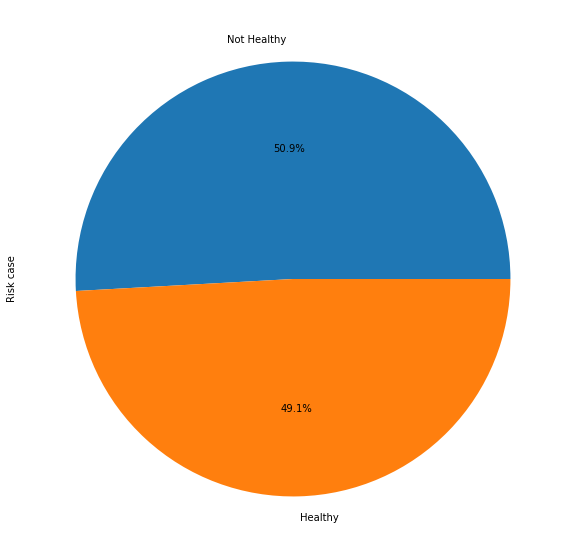

In [18]:
# combined_df['Risk case'] = [classes_le.classes_[i] for i in combined_df['Risk case']]
combined_df['Risk case'].value_counts().plot(kind = 'pie',autopct='%1.1f%%', figsize = (10,10))